### Könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### X-ek és hozzájuk tartozó logaritmikus y-ok generálása

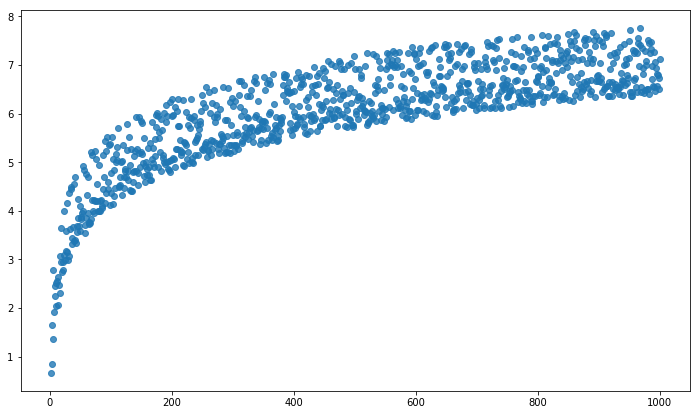

In [3]:
X = np.linspace(start=2, stop=1000, num=1000)
y = []

for i in range(1000):
    rnd = np.random.randint(0, 2)
    rand = np.random.random()
    if(rnd == 0):
        y.append(np.log(X[i]) + rand)
    else:
        y.append(np.log(X[i]) - rand/2)
        
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.8)

### X-ekből log(X)-ek készítése - log_X

LinregressResult(slope=1.0101688298584213, intercept=0.05856969092070674, rvalue=0.9107199924322558, pvalue=0.0, stderr=0.014501718000942283)

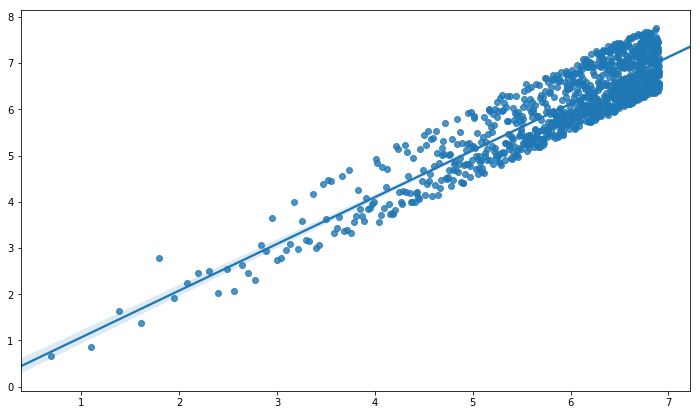

In [5]:
log_X = np.log(X)

plt.figure(figsize=(12, 7))
sns.regplot(x=log_X, y=y)

egyenes = stats.linregress(np.log(X), y)
b0 = egyenes.intercept
b1 = egyenes.slope
egyenes

### log(X), y-hoz tartozó egyenes ábrázolása

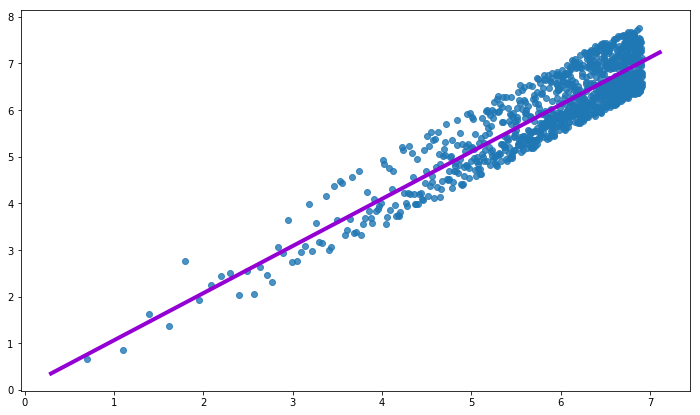

In [6]:
plt.figure(figsize=(12, 7))
plt.scatter(log_X, y, alpha=0.8)

vonal_x = np.linspace(np.min(log_X)-0.4, np.max(log_X)+0.2, 2)
vonal_y = (b0 + b1*vonal_x)

plt.plot(vonal_x, vonal_y, c='darkviolet', linewidth=4,)

### Logaritmikus görbe ábrázolása

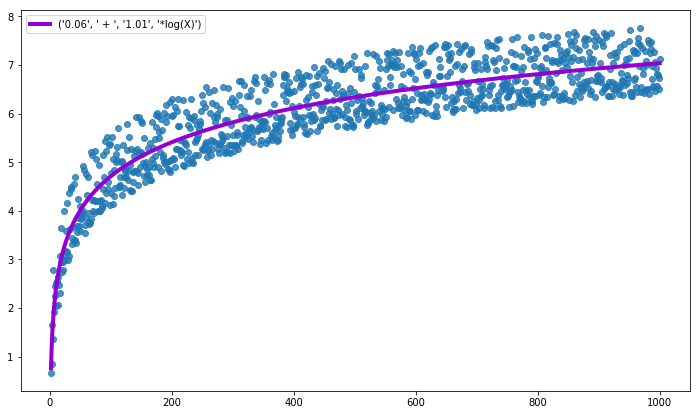

In [9]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.8)


plt.plot(X, b0 + b1*np.log(X), c='darkviolet', linewidth=4, label=('{0:.2f}'.format(b0),' + ','{0:.2f}'.format(b1), '*log(X)'))
plt.legend()

### Prediction

In [10]:
def log_predict(x):
    return b0 + b1*np.log(x)

log_predict(200)

5.410764745305089

### R^2

In [11]:
from sklearn.metrics import r2_score

ylog_predicted = list(map(log_predict, X))
print('R^2: ', r2_score(y, ylog_predicted)) #(tényleges, predicted)

R^2:  0.8294109046158079


###   
###   
### Másik módszer - scipy curve_fit

In [12]:
from scipy.optimize import curve_fit 

def log(x, a, b): 
    return a*np.log(b*x) 
  
param, param_cov = curve_fit(log, X, y) 

print('B0: ', param[0])
print('B1: ', param[1])

B0:  1.0101688306223466
B1:  1.059693903849928


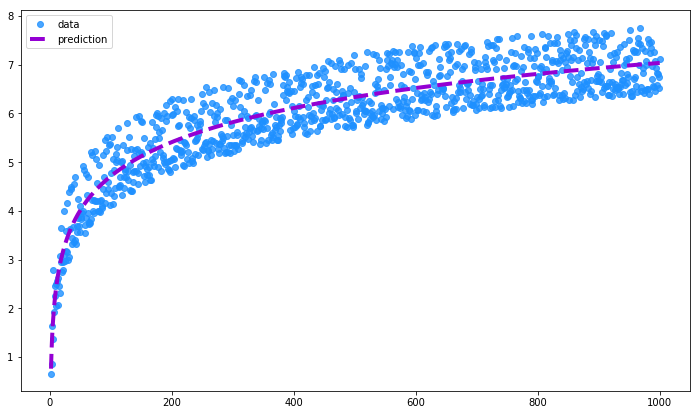

In [13]:
ans = (param[0]*(np.log(param[1]*X)))

plt.figure(figsize=(12, 7))
plt.plot(X, y, 'o', color ='dodgerblue', label ="data", alpha=0.8)
plt.plot(X, ans, '--', color ='darkviolet', linewidth=4, label ="prediction")

plt.legend()
plt.show()